In [10]:
pip install ../../

Defaulting to user installation because normal site-packages is not writeable
Processing /home/mehdi/code/Straph
  Preparing metadata (setup.py) ... done
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=129897 sha256=41b31bec1cd9daab92229d5f7ff9759fbac33d941952f1184b03e3e13bf6b74e
  Stored in directory: /tmp/pip-ephem-wheel-cache-sz7c5_2e/wheels/37/09/70/7b86f721614374ec311fa16ed21dbb33c1959d2c6f80461dfd
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
Note: you may need to restart the kernel to use updated packages.


In [1]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
import straph.betweenness.volumes as vol
import straph.paths.meta_walks as mw
import straph.betweenness.optimal_paths as opt

path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "erdos_dis_nodes.sg",
                     path_links=path_directory + "erdos_dis_links.sg")
# S = sg.erdos_renyi_discrete([1,5], 5, 0.15)
# S.describe()

<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


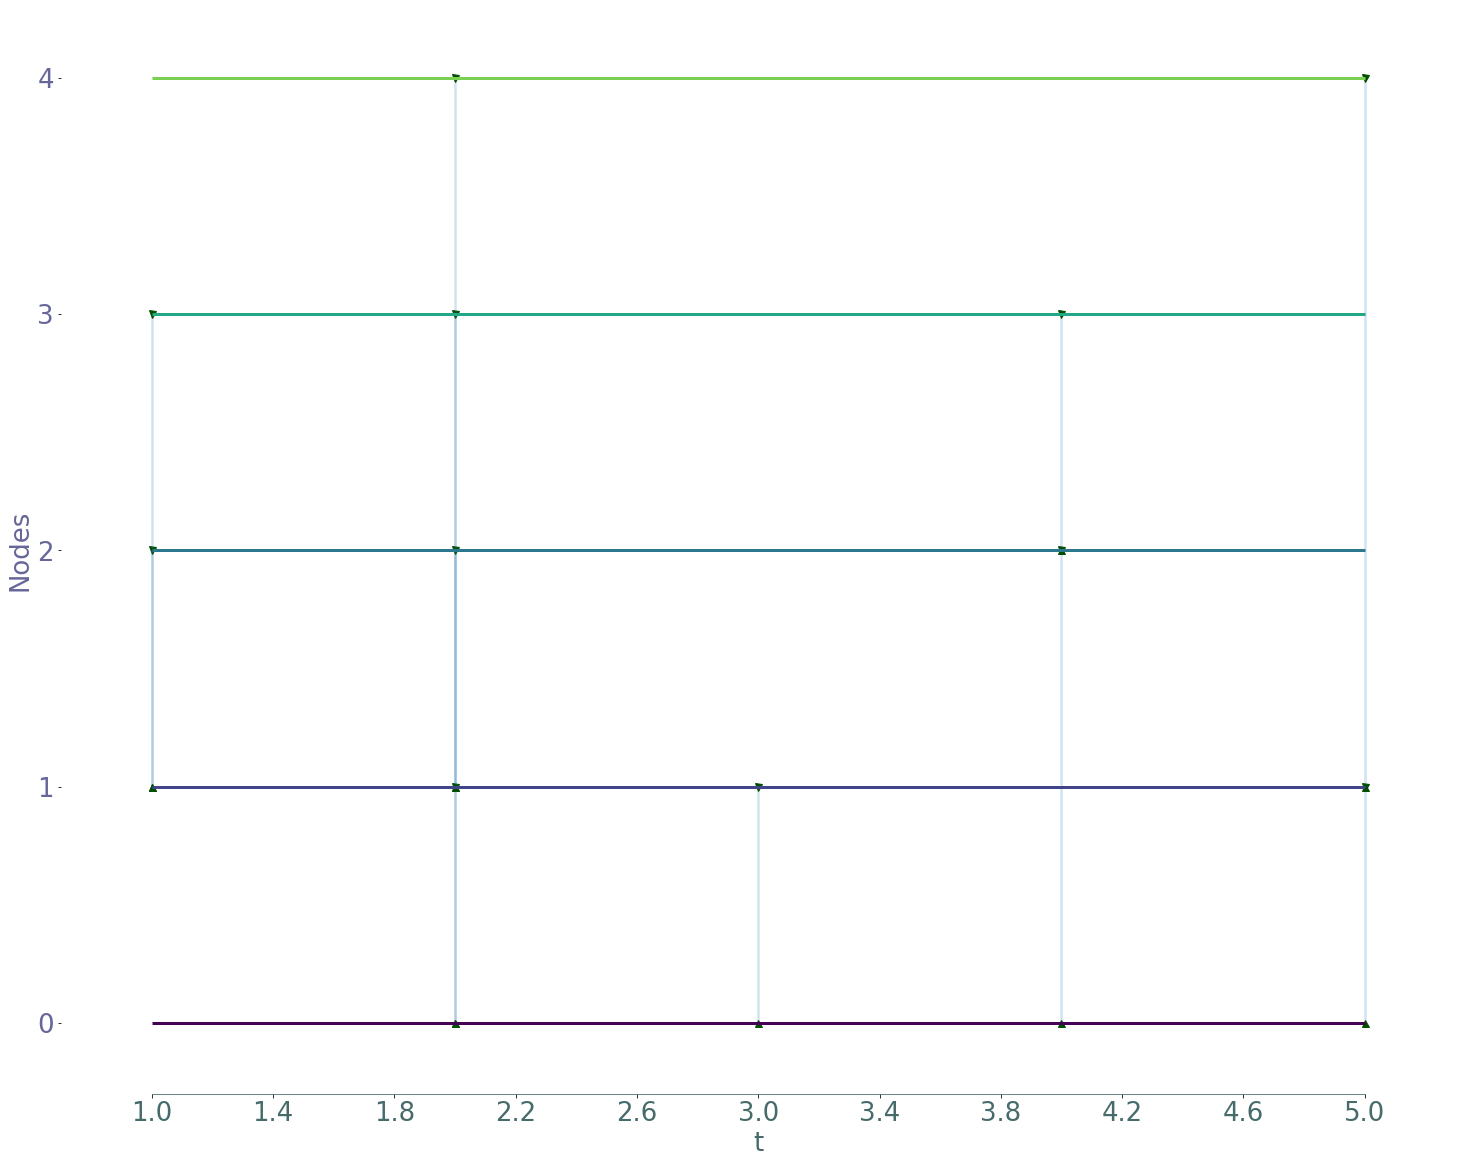

In [2]:
S.plot()

In [3]:
events, events_reverse = bt.events_dic(S)

In [4]:
link_ind = bt.link_index(S)
neighbors, neighbors_inv = bt.neighbors_direct(S)

In [5]:
node = 0

In [6]:
import operator
import networkx as nx
b = operator.lt
walk_type = "active"
fun =  opt.co_sh_im

In [7]:
pre, cur_best, opt_walk = bt.dijkstra_directed_dis_gen(S, node, events, events_reverse, neighbors, neighbors_inv, link_ind, b, fun, walk_type)


In [8]:
pre2, cur_best2, opt_walk2 = bt.ford_bellman_directed_gen_dis(S, node, events, events_reverse, neighbors, neighbors_inv, link_ind, b, fun, walk_type)


In [9]:
pre3, cur_best3, opt_walk3 = bt.bfs_directed_dis_gen(S, node, events, events_reverse, neighbors, neighbors_inv, link_ind, b, fun, walk_type)


In [11]:
def check_pre_cur_dij_bell(pre,pre2):
    for v in range(len(pre)):
        for t in pre[v].keys():
            if v > len(pre2) or t not in pre2[v].keys():
                print("problem", v,t, "not present in", pre2)
                return False
            if pre[v][t] != pre2[v][t]:
                print("problem", "v",v,"t",t,pre[v][t], pre2[v][t])
                return False
    return True
def check_pre_cur(pre,pre2,cur,cur2):
    return check_pre_cur_dij_bell(pre,pre2) and check_pre_cur_dij_bell(pre2,pre) and check_pre_cur_dij_bell(cur,cur2) and check_pre_cur_dij_bell(cur2,cur)

In [19]:
def all_check(S):
    for nod in S.nodes:
        pre, cur_best, opt_walk = bt.dijkstra_directed_dis_gen(S, nod, events, events_reverse, neighbors, neighbors_inv, link_ind, b, fun, walk_type)
        pre2, cur_best2, opt_walk2 = bt.ford_bellman_directed_gen_dis(S, nod, events, events_reverse, neighbors, neighbors_inv, link_ind, b, fun, walk_type)
        pre3, cur_best3, opt_walk3 = bt.bfs_directed_dis_gen(S, nod, events, events_reverse, neighbors, neighbors_inv, link_ind, b, fun, walk_type)
        if not check_pre_cur(pre,pre3, cur_best,cur_best3):
            return False
    return True

In [20]:
all_check(S)

True

In [65]:
S.write_to_sg("examples/erdos_dis")

In [40]:
G = bt.predecessor_graph_dis_gen(S, pre,node)
preced = bt.preced_node(S, G,events,events_reverse)
node_inf, clos_inf = bt.remove_infinite_from_predecessor_dis_gen(S, G, events, events_reverse, opt_walk,
                                                                 cur_best, mw.Metawalk.co_short, len(S.nodes),
                                                                 walk_type, b)
GG = bt.graph_to_ordered(G, events, events_reverse)

In [41]:
node_inf

set()

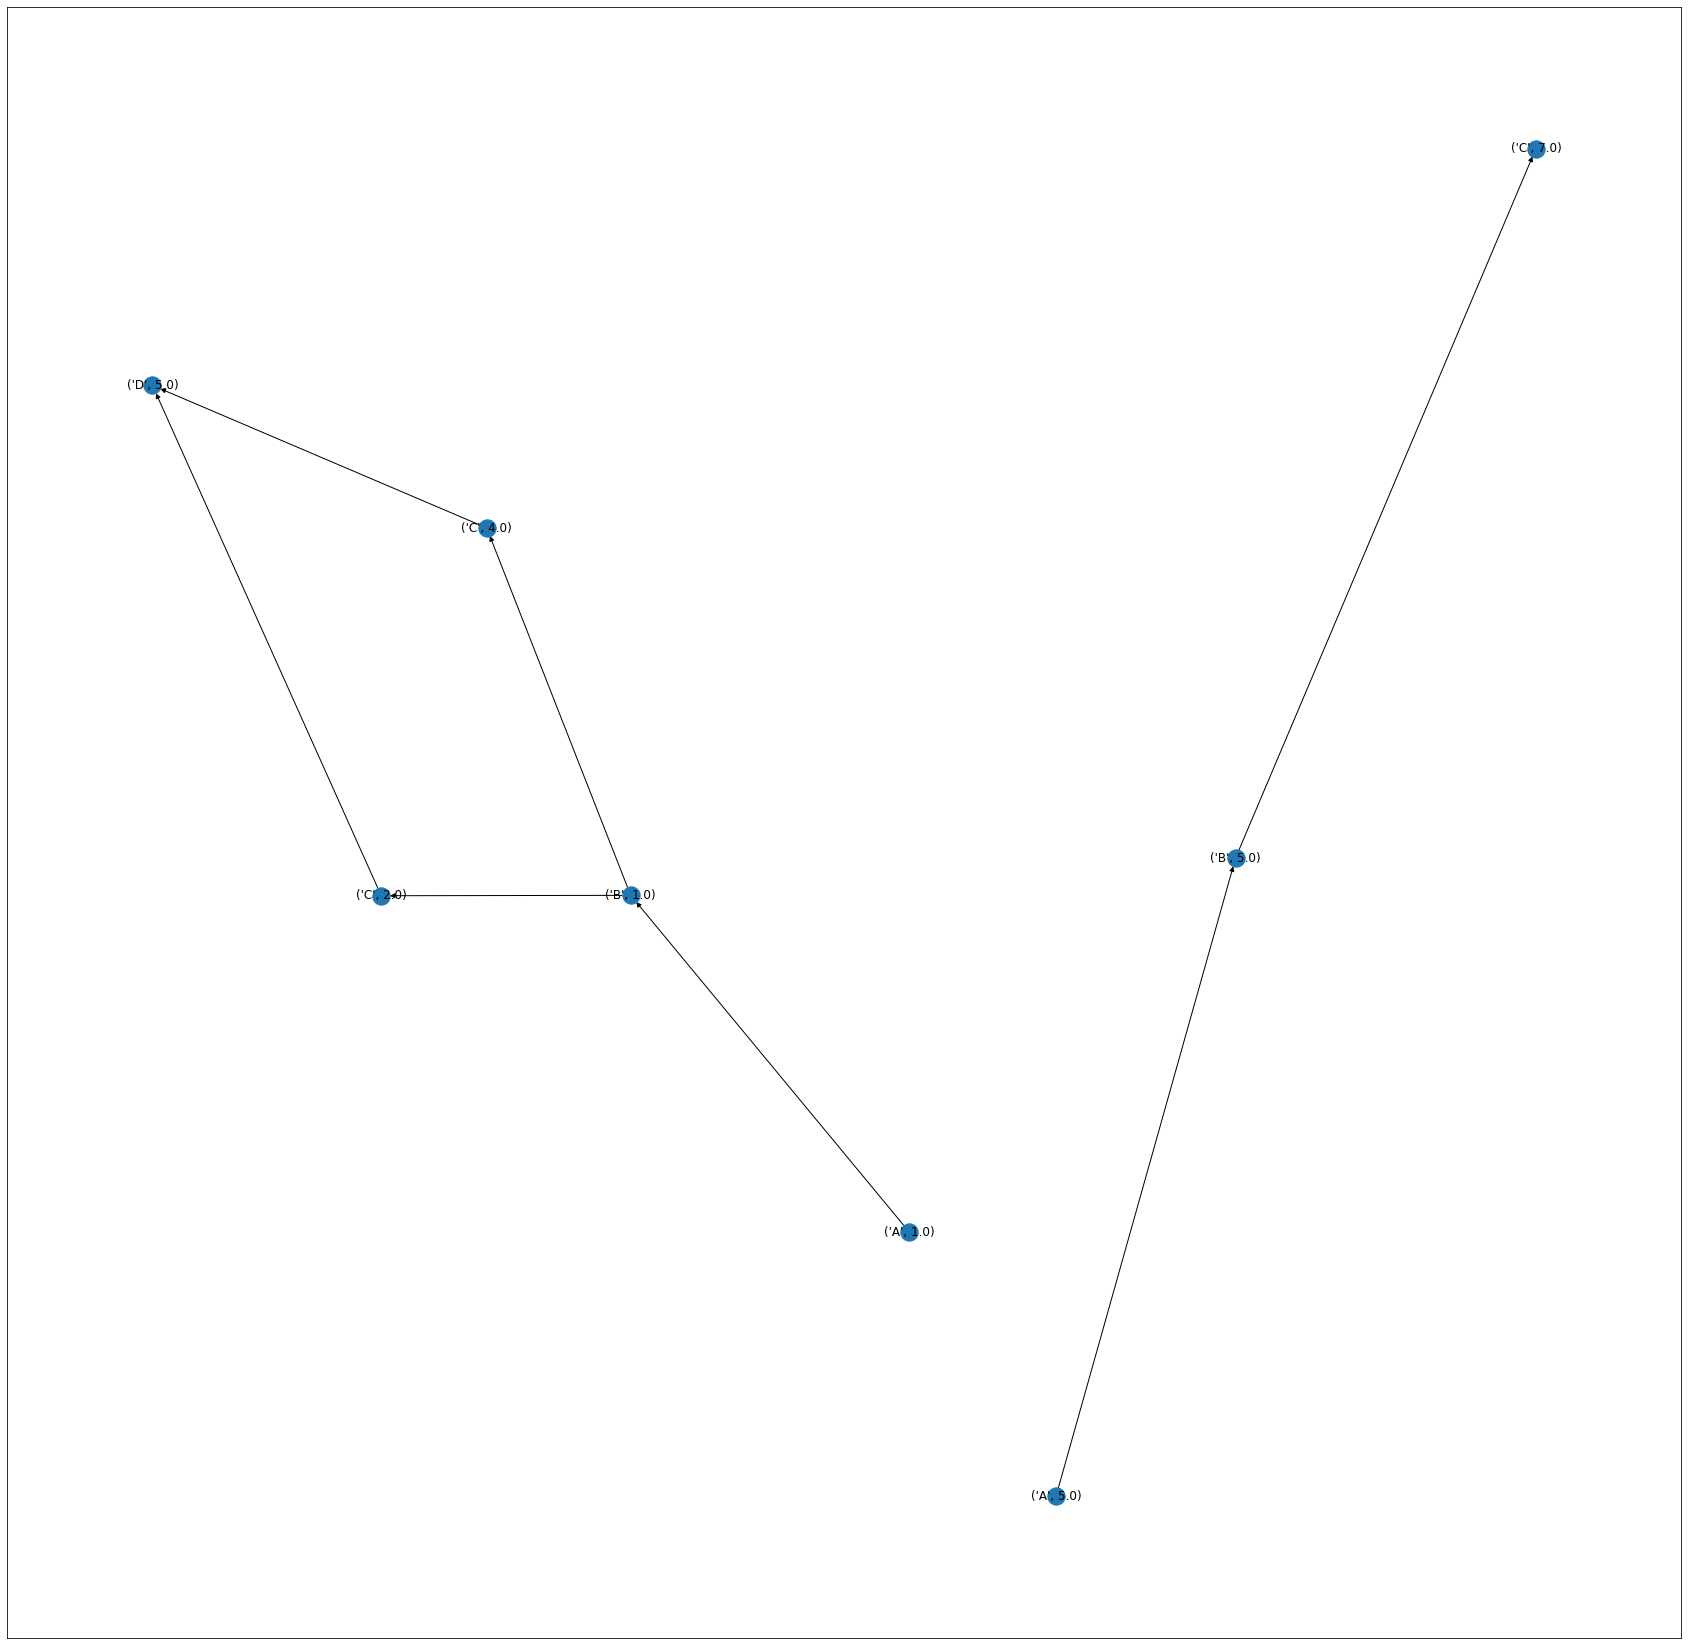

In [42]:
import networkx as nx
GD = G.graph
ren = dict()
for e in GD.nodes:
    ren[e] = (S.node_to_label[e[0]],e[1])
#print(ren)
GN =  nx.relabel_nodes(GD, ren, copy=True)
fig, ax = plt.subplots(figsize=(30,30))
nx.draw_networkx(GN,arrows=True,width = 1,ax = ax)

In [43]:
sigma = bt.volume_metapaths_at_dis_gen(G, node)
#print("sigma",sigma)
bt.sigma_infinite(sigma, node_inf)

In [44]:
sigma

{(0, 5.0): 1,
 (1, 5.0): 1,
 (2, 7.0): 1,
 (0, 1.0): 1,
 (1, 1.0): 1,
 (2, 2.0): 1,
 (2, 4.0): 1,
 (3, 5.0): 2}

In [45]:
sigma_tot, min_values, sigma_tot_t = bt.sigma_total_dis_gen(sigma, S, cur_best, node, events)

In [46]:
print(sigma_tot,sigma_tot_t)

{0: 2, 1: 2, 2: 1, 3: 2} {0: {1.0: 1, 5.0: 1}, 1: {1.0: 1, 5.0: 1}, 2: {2.0: 1, 4.0: 0, 7.0: 0}, 3: {5.0: 2}, 4: {}}


In [47]:
sigma_tot_r = bt.complete_sigma_tot_t(S, sigma_tot_t, node_inf, events, node)
print(sigma_tot_r)

{(0, 0.0): 0, (0, 1.0): 1, (0, 2.0): 0, (0, 3.0): 0, (0, 4.0): 0, (0, 5.0): 1, (0, 7.0): 0, (1, 0.0): 0, (1, 1.0): 1, (1, 2.0): 0, (1, 3.0): 0, (1, 4.0): 0, (1, 5.0): 1, (1, 7.0): 0, (2, 0.0): 0, (2, 1.0): 0, (2, 2.0): 1, (2, 3.0): 0, (2, 4.0): 0, (2, 5.0): 0, (2, 7.0): 0, (3, 0.0): 0, (3, 1.0): 0, (3, 2.0): 0, (3, 3.0): 0, (3, 4.0): 0, (3, 5.0): 2, (3, 7.0): 0, (4, 0.0): 0, (4, 1.0): 0, (4, 2.0): 0, (4, 3.0): 0, (4, 4.0): 0, (4, 5.0): 0, (4, 7.0): 0}


In [48]:
node_inf = node_inf.union(clos_inf)
sigma_r = bt.optimal_paths_resting_type(S, node, events, G, sigma, cur_best, node_inf, opt_walk, mw.Metawalk.co_short, len(S.nodes), walk_type)

In [49]:
sigma_r

{(0, 5.0): 1,
 (1, 5.0): 1,
 (2, 7.0): 1,
 (0, 1.0): 1,
 (1, 1.0): 1,
 (2, 2.0): 1,
 (2, 4.0): 1,
 (3, 5.0): 2}

In [50]:
deltasvvt = bt.dictionary_svvt_dis_gen(S, node, sigma_tot_r,min_values, cur_best, sigma_tot, events)

In [51]:
deltasvvt

{(0, 0.0): 0.0,
 (0, 1.0): 0.0,
 (0, 2.0): 0.0,
 (0, 3.0): 0.0,
 (0, 4.0): 0.0,
 (0, 5.0): 0.0,
 (0, 7.0): 0.0,
 (1, 0.0): 0.0,
 (1, 1.0): 0.5,
 (1, 2.0): 0.0,
 (1, 3.0): 0.0,
 (1, 4.0): 0.0,
 (1, 5.0): 0.5,
 (1, 7.0): 0.0,
 (2, 0.0): 0.0,
 (2, 1.0): 0.0,
 (2, 2.0): 1.0,
 (2, 3.0): 0.0,
 (2, 4.0): 0.0,
 (2, 5.0): 0.0,
 (2, 7.0): 0.0,
 (3, 0.0): 0.0,
 (3, 1.0): 0.0,
 (3, 2.0): 0.0,
 (3, 3.0): 0.0,
 (3, 4.0): 0.0,
 (3, 5.0): 1.0,
 (3, 7.0): 0.0,
 (4, 0.0): 0.0,
 (4, 1.0): 0.0,
 (4, 2.0): 0.0,
 (4, 3.0): 0.0,
 (4, 4.0): 0.0,
 (4, 5.0): 0.0,
 (4, 7.0): 0.0}

In [52]:
preced = bt.preced_node(S, G,events,events_reverse)

In [53]:
preced[1]

{1.0: 1.0, 5.0: 5.0, 2.0: 1.0, 3.0: 1.0, 4.0: 1.0, 7.0: 5.0}

In [54]:
contribution = bt.general_contribution_from_node_dis_gen(S, G, node, GG, sigma_r, deltasvvt, events, events_reverse, pre, preced, walk_type)

In [55]:
contribution

{2: {7.0: 0.0, 4.0: 0.5, 2.0: 1.5, 0.0: 0.0, 1.0: 0.0, 3.0: 0.0, 5.0: 0.0},
 1: {5.0: 0.5, 1.0: 2.5, 0.0: 0.0, 2.0: 0.0, 3.0: 0.0, 4.0: 0.0, 7.0: 0.0},
 0: {5.0: 0.5, 1.0: 2.5, 0.0: 0.0, 2.0: 0.0, 3.0: 0.0, 4.0: 0.0, 7.0: 0.0},
 3: {5.0: 1.0, 0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 3.0: 0.0, 4.0: 0.0, 7.0: 0.0},
 4: {0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 3.0: 0.0, 4.0: 0.0, 5.0: 0.0, 7.0: 0.0}}

In [56]:
events

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0]

In [ ]:
0, -1.66533e-16, 2, 0.983537, 1.9, 0, 2.86667
1, 4.996e-16, 2, 0.307255, 2, 0, 2.75
2, -9.99201e-16, 4, 0.586101, 9.5, 0, 11.1667
3, -3.33067e-16, 36.5, 1.04837, 8.95, 0, 14.9833
4, -1.22125e-15, 14, 0.383013, 0.2, 0, 0
5, 0, 17.3333, 8.88178e-16, 4, 0, 8.56667
6, 4.44089e-16, 2.16667, 1.20615, 7.5, 0, 5.58333
7, 0, 0, -9.99201e-16, 2, 0, 2.36667
8, -1.33227e-15, 0, 0.774038, 5, 0, 2.08333
9, 2.77556e-16, 34, 0.711538, 5.95, 0, 19.95


In [7]:
41*5

205